##### This code takes data from KRAKEN Exchange and transoforms the data in a suitable format for work which is not downloaded from YahooFinance.

- Notebook to be used with data which comes in a csv file format and not from an API

In [2]:
import os 
import datetime
import pandas as pd 
import numpy as np 

In [3]:
columns = ['Timestamp','Open','High', 'Low', 'Close', 'Volume', 'Trades']

df = pd.read_csv('data/BTC-USD/XBTUSD_15.csv', header = None, names = columns)
df['datetime'] = pd.to_datetime(df['Timestamp'], unit='s')
#df.columns = columns
df.head(100)

,Timestamp,Open,High,Low,Close,Volume,Trades,datetime
0,1381095000,122.00000,122.00000,122.00,122.00,0.100000,1,2013-10-06 21:30:00
1,1381178700,123.61000,123.61000,123.61,123.61,0.100000,1,2013-10-07 20:45:00
2,1381200300,123.91000,123.91000,123.90,123.90,1.991600,2,2013-10-08 02:45:00
3,1381209300,124.19000,124.19000,124.18,124.18,2.000000,2,2013-10-08 05:15:00
4,1381311000,124.01687,124.01687,123.84,123.84,2.823000,3,2013-10-09 09:30:00
...,...,...,...,...,...,...,...,...
95,1382627700,199.73000,199.73000,198.60,198.60,7.510070,7,2013-10-24 15:15:00
96,1382629500,198.00000,198.00000,198.00,198.00,3.000000,2,2013-10-24 15:45:00
97,1382630400,197.06000,197.06000,196.72,196.72,4.000000,4,2013-10-24 16:00:00
98,1382631300,192.91000,193.25000,192.91,193.25,1.469862,2,2013-10-24 16:15:00


In [4]:
df['open_low'] = 100*((df['Open'] - df['Low']) / df['Open']) 

df['open_close'] = 100*((df['Open'] - df['Close']) / df['Open'])

df['open_high'] = 100*((df['Open'] - df['High']) / df['Open'])

df['high_low'] = 100*(abs(df['High'] - df['Low']) / df['High'])

df['low_close'] = 100*((df['Low'] - df['Close']) / df['Low'])

df['high_close'] = 100*((df['Close'] - df['High']) / df['High'])

df.index = df['datetime']

df.head()

,Timestamp,Open,High,Low,Close,Volume,Trades,datetime,open_low,open_close,open_high,high_low,low_close,high_close
datetime,,,,,,,,,,,,,,
2013-10-06 21:30:00,1381095000,122.00000,122.00000,122.00,122.00,0.1000,1,2013-10-06 21:30:00,0.000000,0.000000,0.0,0.000000,0.0,0.000000
2013-10-07 20:45:00,1381178700,123.61000,123.61000,123.61,123.61,0.1000,1,2013-10-07 20:45:00,0.000000,0.000000,0.0,0.000000,0.0,0.000000
2013-10-08 02:45:00,1381200300,123.91000,123.91000,123.90,123.90,1.9916,2,2013-10-08 02:45:00,0.008070,0.008070,0.0,0.008070,0.0,-0.008070
2013-10-08 05:15:00,1381209300,124.19000,124.19000,124.18,124.18,2.0000,2,2013-10-08 05:15:00,0.008052,0.008052,0.0,0.008052,0.0,-0.008052
2013-10-09 09:30:00,1381311000,124.01687,124.01687,123.84,123.84,2.8230,3,2013-10-09 09:30:00,0.142618,0.142618,0.0,0.142618,0.0,-0.142618


In [5]:
df = df[df.index >= '2016-01-01']

In [6]:
df.index.min()

Timestamp('2016-01-01 04:15:00')

In [7]:
df.shape

(301373, 14)

In [8]:
df.datetime.max()

Timestamp('2024-09-30 23:45:00')

In [9]:
df.to_csv('data/BTC-USD/BTCUSD_15.csv')

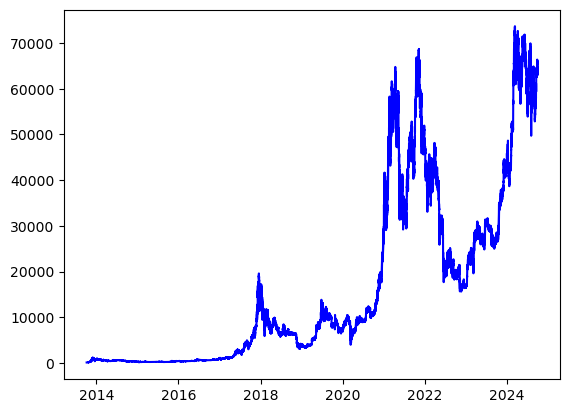

In [ ]:
import matplotlib.pyplot as plt 

plt.plot(df.datetime, df.Close, c = 'b')
